# Sobre o algoritmo

O intuito desse jupyter notebook é desenvolver o algoritmo de rank de grafo, tendo como base o algoritmo PageRank de Stanford, criado por Larry Page, co-fundador da Google, muito utilizado para ranquear as páginas mais relevantes da Web pelos hiperlink conectados.

----------------
Bibliotecas utilizadas

In [417]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

-----------------------
Criando Grafo com arestas direcionadas

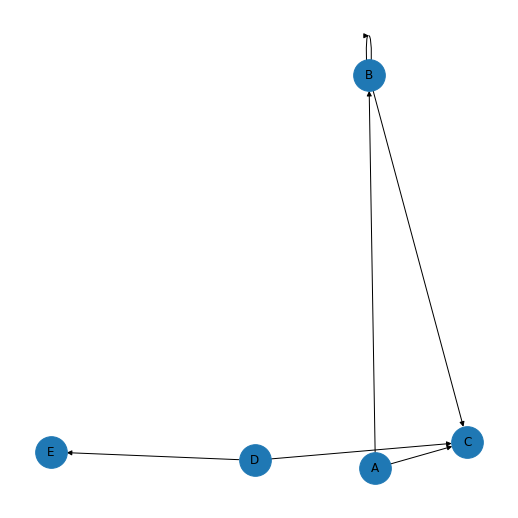

In [418]:
def create_graph(nodes, edges):
    G = nx. DiGraph()
    for i in range(nodes):
        G.add_node(chr(i+65))
    
    for i in range(edges):
        G.add_edge(chr(random.randint(65, nodes+64)), chr(random.randint(65, nodes+64)))

    return G

G = create_graph(5, 10)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000)
plt.show()


----------------
Criando matriz de adjacências para melhor visualização do grafo

[[0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0.]]


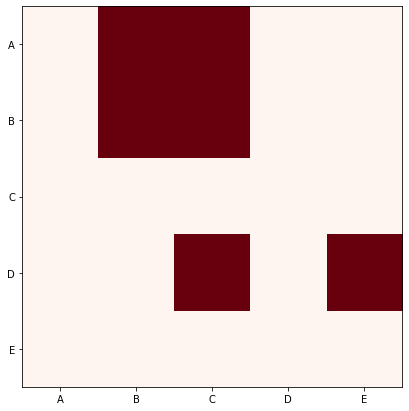

In [425]:
matriz = nx.to_numpy_matrix(G)
print(matriz)


plt.imshow(matriz, cmap='Reds', interpolation='nearest')
plt.xticks(range(len(matriz)), list(G.nodes()))
plt.yticks(range(len(matriz)), list(G.nodes()))
plt.show()


----------------
Ajuste estocástico para o nó que não recebe nenhuma aresta

In [420]:
soma_linhas = np.sum(matriz, axis=1)

for i in range(len(soma_linhas)):
    if soma_linhas[i] == 0:
        for j in range(len(matriz)):
            matriz[i,j] = 1 / len(matriz)
    

----------------

Calculo de ranqueamento dos nós:

<div style="background-color: white; width: 300px">
    <img src="calc_to_rank.png">
</div>

In [421]:
def rank_to_graph(matriz, rank_nodes):
    if rank_nodes is None:
        rank_nodes = [1 / len(matriz) for i in range(len(matriz))]

    list_nodes_rg = []
    for i in range(len(matriz)):
        temp = 0
        for j in range(len(matriz)):
            if matriz[i,j] == 1 and i != j:
                temp += matriz[i,j]
        list_nodes_rg.append(temp)
    
    list_sum = np.zeros(len(matriz))
    for i in range(len(matriz)):
        for j in range(len(matriz)):
            if matriz[j,i] == 1 and j != i:
                list_sum[i] += rank_nodes[j] / list_nodes_rg[j]

    list_rank = np.zeros(len(matriz))
    for i in range(len(matriz)):
        list_rank[i] = (1 - .85) / len(matriz) + .85 * list_sum[i]

    return list_rank


0.23733750000000003


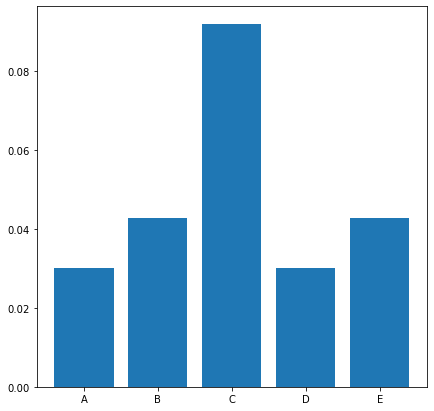

In [422]:
rank_nodes = [1 / len(matriz) for i in range(len(matriz))]
for i in range(10):
    rank_nodes = rank_to_graph(matriz, rank_nodes)

print(sum(rank_nodes))

# mostrar grafi  de bar com a legenda em ordem alfabética
plt.bar(range(len(rank_nodes)), rank_nodes)
plt.xticks(range(len(rank_nodes)), list(G.nodes()))
plt.show()




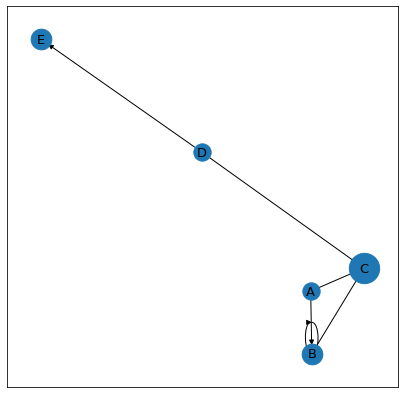

In [423]:
# deixar a seta maior

pos = nx.spring_layout(G)
for i in range(len(rank_nodes)):
    nx.draw_networkx_nodes(G, pos, nodelist=[chr(i+65)], node_size=rank_nodes[i] * 10000)
nx.draw_networkx_edges(G, pos, alpha=1)
nx.draw_networkx_labels(G, pos, font_size=13, font_family='sans-serif')
plt.show()

----------------

## Referências de estudos:

Algoritmo e cálculo para relevância do nó no grafo -
<a>https://pt.wikipedia.org/wiki/PageRank</a>

Biblioteca de grafos -
<a>https://networkx.org/documentation/stable/developer/index.html</a>